#EM CLUSTERING (Probabilistic) and DBSCAN (Grid-based)

#EM algorithm


The Expectation-Maximization (EM) algorithm is an iterative way to find maximum-likelihood estimates for model parameters when the data is incomplete or has some missing data points or has some hidden variables. EM chooses some random values for the missing data points and estimates a new set of data. These new values are then recursively used to estimate a better first date, by filling up missing points, until the values get fixed.

EM is analogous to Representative based algorithm because it requires to set the number of clusters a priori, the difference is that Representative Based are based on the concept of distance while EM is based on a probabilistic concept. Kmeans can find circular clusters, EM instead can find elliptical clusters.

In [ ]:
from sklearn.mixture import GaussianMixture
!pip install pyreadr
import pyreadr
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 361 kB 34.1 MB/s 


In [ ]:
data = pyreadr.read_r('/content/syntdata0.RDS')
df = data[None]
df

,0,1
0,10.268548,5.160963
1,10.171765,4.608081
2,10.218156,5.787864
3,10.231643,5.321450
4,10.220213,5.044880
...,...,...
145,11.004996,5.522664
146,10.901687,5.833739
147,10.797328,6.862563
148,10.870361,6.097340


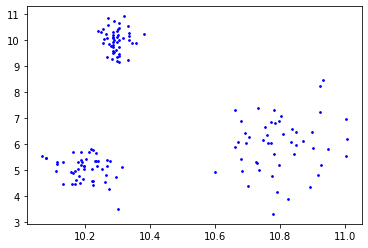

In [ ]:
plt.scatter(df[0], df[1], s=3, c='blue')

Normalization : with EM the normalization is not strictly necessary, EM is able to manage neighborhoods that are elliptical.
The fundamental difference between probabilistic and distance based algorithms is that for the probabilistic algorithms the normalization is in fact performed directly by the algorithm. If instead we use Kmeans (distance based) the algorithm is not able to make a deformation on the axes, we must impose it by passing through the preprocessing.

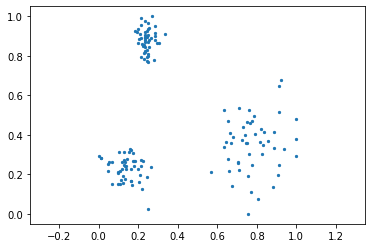

In [ ]:
from sklearn import preprocessing
import pandas as pd

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
plt.scatter(df_scaled[0].values, df_scaled[1].values, s=5)
plt.axis('equal')
plt.show()

Kmeans initialization

The data labels are:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


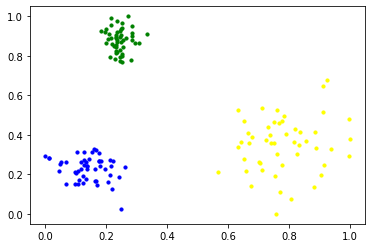

In [ ]:
gmm = GaussianMixture(n_components = 3) #(init_params='kmeans')
 
# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(df_scaled)
# Assign a label to each sample
labels = gmm.predict(df_scaled)
print('The data labels are: ', labels)

filtered_label0 = df_scaled[labels == 0]
filtered_label1 = df_scaled[labels == 1]
filtered_label2 = df_scaled[labels == 2]
#plotting the results
plt.scatter(filtered_label0[0] , filtered_label0[1], s=10, color='green')
plt.scatter(filtered_label1[0] , filtered_label1[1], s=10, color='blue')
plt.scatter(filtered_label2[0] , filtered_label2[1], s=10, color='yellow')
plt.show()

Random initialization

The data labels are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


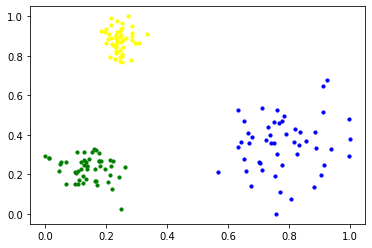

In [ ]:
gmm = GaussianMixture(n_components = 3, init_params='random')  #inizializzazione completamente randomica, funziona peggio
 
# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(df_scaled)
# Assign a label to each sample
labels = gmm.predict(df_scaled)
print('The data labels are: ', labels)

filtered_label0 = df_scaled[labels == 0]
filtered_label1 = df_scaled[labels == 1]
filtered_label2 = df_scaled[labels == 2]
#plotting the results
plt.scatter(filtered_label0[0] , filtered_label0[1], s=10, color='green')
plt.scatter(filtered_label1[0] , filtered_label1[1], s=10, color='blue')
plt.scatter(filtered_label2[0] , filtered_label2[1], s=10, color='yellow')
plt.show()

In [ ]:
print('The means are:')
for x, y in gmm.means_:
    print('(%f, %f)' %(x, y))
print('The covariance matrices are:')
for i in gmm.covariances_:
    print(i)

The means are:
(0.139585, 0.230072)
(0.781459, 0.351132)
(0.243173, 0.879137)
The covariance matrices are:
[[ 0.00368695 -0.00087336]
 [-0.00087336  0.00362291]]
[[0.01086126 0.00218396]
 [0.00218396 0.01883833]]
[[ 8.62075195e-04 -5.80762563e-05]
 [-5.80762563e-05  3.31587892e-03]]


#DB SCAN

In [ ]:
from sklearn.cluster import DBSCAN

the labels are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


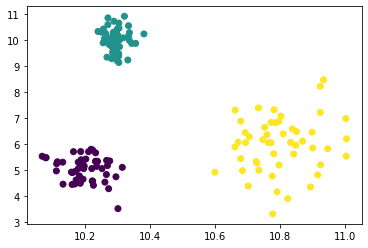

In [ ]:
#Numpy array of all the cluster labels assigned to each data point
dbscan = DBSCAN(eps = 0.3, min_samples = 5).fit(df_scaled) #the normalized dataset is used 
labels = dbscan.labels_

print('the labels are:', labels)
plt.scatter(df[0], df[1], c=dbscan.labels_)

the labels are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


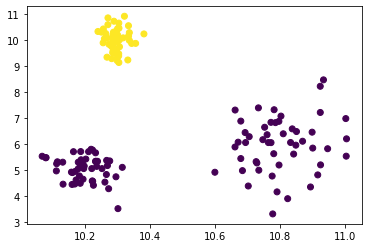

In [ ]:
#Numpy array of all the cluster labels assigned to each data point
dbscan = DBSCAN(eps = 0.4, min_samples = 5).fit(df_scaled)
labels = dbscan.labels_

print('the labels are:', labels)
plt.scatter(df[0], df[1], c=dbscan.labels_)

eps, default=0.5. Epsilon is the maximum distance between two samples for one to be considered as in the neighborhood of the other. This is the most important DBSCAN parameter to choose appropriately for the data set and distance function.

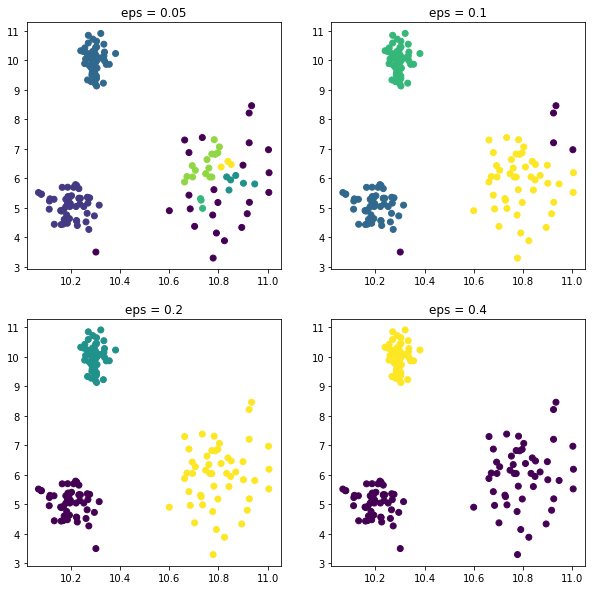

In [ ]:
epsilon = [0.05, 0.1, 0.2, 0.4]
fig, axs = plt.subplots(2, 2, figsize=(10,10))
for i in range(2):
    for j in range(2):
        #for eps in [0.1, 0.2, 0.4, 0.8]:
        eps = epsilon[i*2+j]
        dbscan = DBSCAN(eps=eps, min_samples=3).fit(df_scaled)
        axs[i, j].scatter(df[0], df[1], c=dbscan.labels_)
        axs[i, j].set_title('eps = ' + str(eps))
plt.show()

min_samples, default=5. Min Samples is the number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

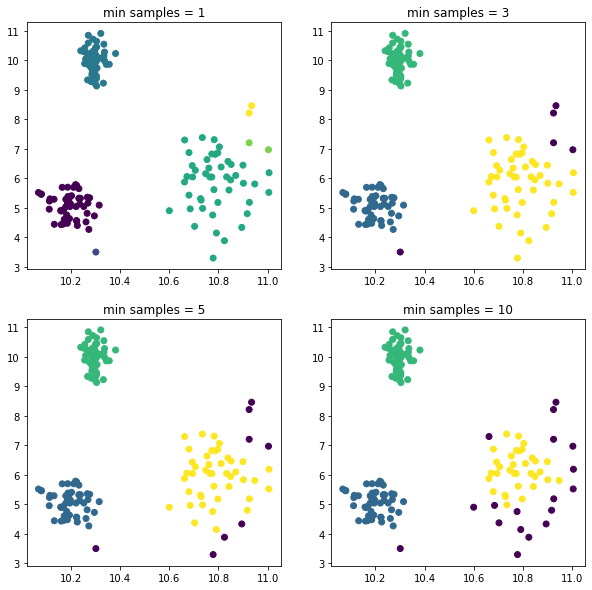

In [ ]:
minS = [1, 3, 5, 10]
fig, axs = plt.subplots(2, 2, figsize=(10,10))
for i in range(2):
    for j in range(2):
        #for eps in [0.1, 0.2, 0.4, 0.8]:
        mini = minS[i*2+j]
        dbscan = DBSCAN(eps=0.1, min_samples=mini).fit(df_scaled)
        axs[i, j].scatter(df[0], df[1], c=dbscan.labels_)
        axs[i, j].set_title('min samples = ' + str(mini))
plt.show()

## CLUSTER VALIDATION
##### After a clustering of the data has been determined, it is important to evaluate its quality (whichever clustering algorithm has been used)
##### Cluster validation is often difficult in real data sets because the problem is defined in an **unsupervised way**
##### Thus, a number of **internal criteria** may be defined to validate the quality of a clustering

#### **Sum of square (SSQ) distances to centroids** 
The centroids of the different clusters are determined, and the sum of squared distances are reported as the corresponding objective function. Smaller values of this measure are indicative of better cluster quality. However, the absolute distances provide no meaningful information about the quality of the underlying clusters.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

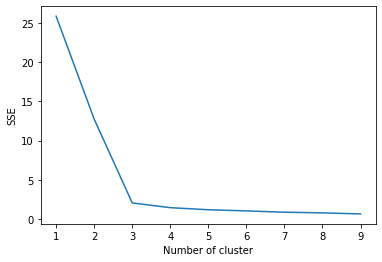

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scaled)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### **Elbow Criterion Method:**

The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (num_clusters, e.g k=1 to 10), and for each value of k, calculate sum of squared errors (SSE).

After that, plot a line graph of the SSE for each value of k. If the line graph looks like an arm - a red circle in below line graph (like angle), the "elbow" on the arm is the value of optimal k (number of cluster). Here, we want to minimize SSE. SSE tends to decrease toward 0 as we increase k (and SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

So the goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

We can see in the plot that 3 is the optimal number of clusters

### **Silhouette coefficient**

In [ ]:
from sklearn.metrics import silhouette_score as sil_sc

In [ ]:
sil = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(df_scaled)
    sil.append(sil_sc(df_scaled, kmeans.labels_))

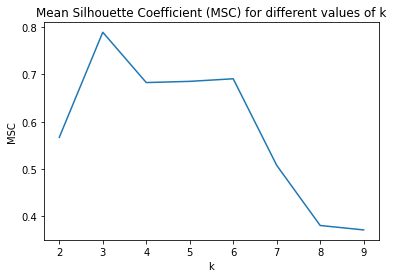

In [ ]:
plt.plot(range(2,10), sil)
plt.xlabel('k')
plt.ylabel('MSC')
plt.title('Mean Silhouette Coefficient (MSC) for different values of k')
plt.show()

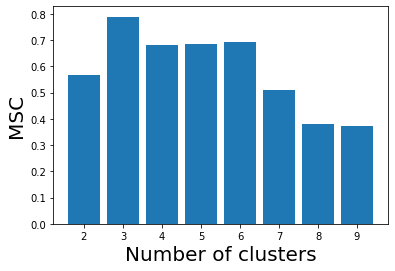

In [ ]:
# Plotting a bar graph to compare the results
plt.bar(range(2,10), sil)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('MSC', fontsize = 20)
plt.show()